In [1]:
#import optimize_na_ga_v2 as opt
import numpy as np
import time
import generalized_genSim_shorten_time as ggsd
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import bluepyopt.deapext.algorithms as algo
import vclamp_evaluator_relative as vcl_ev
import pickle
import time
import numpy as np
from deap import tools
import random
from deap import base, creator
import multiprocessing
import eval_helper as eh
import scoring_functions_relative as sf
import curve_fitting as cf

In [2]:
evaluator = vcl_ev.Vclamp_evaluator_relative('./param_stats_narrow.csv', 'A427D')

/Users/workbench/Applications/nrn/repo/curve_fitting.py:26: RuntimeWarning: overflow encountered in exp
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


In [3]:
hof = tools.HallOfFame(1, similar=np.array_equal)
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=100, hof = hof, map_function=pool.map)
cp_file = './cp.pkl'

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: Runti

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/li

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope =

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/Users/workbench/Applications/nrn/repo/gene

Very bad voltages in activation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min



Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min



Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min



Very bad voltages in inactivation.Very bad voltages in inactivation.



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min



Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery dataCouldn't generate recovery dataCouldn't generate recovery data


Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery dataCouldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)



Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  r

Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)



Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((

Very bad voltages in Recovery.


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.

Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.

Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_msta

Very bad voltages in activation.

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)


Very bad voltages in activation.


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_sta

Very bad voltages in activation.

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/py

Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min




Very bad voltages in inactivation.

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)



Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.Very bad voltages in inactivation.




/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min



Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)



Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery dataCouldn't generate recovery data


Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery dataCouldn't generate recovery dataCouldn't generate recovery dataCouldn't generate recovery dataCouldn't generate recovery data





/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)



Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.Very bad voltages in inactivation.Very bad voltages in inactivation.


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.

Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy

Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))



Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min



Very bad voltages in inactivation.



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data
Couldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery dataCouldn't generate recovery dataCouldn't generate recovery data


Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return 

Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery dataCouldn't generate recovery data



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery dataCouldn't generate recovery data


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.
Very bad voltages in Recovery.

Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.

Very bad voltages in Recovery.Very bad voltages in Recovery.

Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.

Very bad voltages in Recovery.
Very bad voltages in Recovery.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy

Very bad voltages in activation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.



/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery dataCouldn't generate recovery data



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery dataCouldn't generate recovery dataCouldn't generate recovery data


Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Couldn't generate activation data
Very bad voltages in activation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in Recovery.
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.

Very bad voltages in Recovery.Very bad voltages in Recovery.



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/curve_fitting

Very bad voltages in activation.


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:183: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generaliz

Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.Very bad voltages in activation.

Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.Very bad voltages in inactivation.
Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.Very bad voltages in inactivation.


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)



Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data



/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.Very bad voltages in inactivation.




/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.Very bad voltages in activation.



/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten

Very bad voltages in activation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.Very bad voltages in inactivation.Very bad voltages in inactivation.


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)



Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

Couldn't generate recovery dataCouldn't generate recovery data

Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Ver

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:152: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.

/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))



Very bad voltages in inactivation.Very bad voltages in inactivation.

Very bad voltages in inactivation.Very bad voltages in inactivation.



/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in inactivation.
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data

/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/curve_fitting.py:16: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data
Very bad voltages in inactivation.
Very bad voltages in inactivation.


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:346: RuntimeWarning: divide by zero encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Very bad voltages in inactivation.
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Couldn't generate recovery data
Very bad voltages in Recovery.
Very bad voltages in Recovery.Very bad voltages in Recovery.

Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Couldn't generate recovery data
Very bad voltages in activation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in inactivation.
Very bad voltages in Recovery.
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't generate recovery data
Couldn't generate recovery data
Couldn't generate recovery data


/Users/workbench/Applications/nrn/repo/generalized_genSim_shorten_time.py:551: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


In [4]:
start_time = time.time()
#pop, hof, log, hst = deap_opt.run(max_ngen=1, cp_filename=cp_file)
pop, hof, log, hst = deap_opt.run(max_ngen=7, cp_filename=None)
end_time = time.time()
print(end_time - start_time)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/opt/anaconda3/lib/python3.7/site-packages/bluepyopt/deapext/tools/selIBEA.py:83: RuntimeWarning: invalid value encountered in true_divide
  numpy.divide(diff, box_ranges),
/opt/anaconda3/lib/python3.7/site-packages/bluepyopt/deapext/tools/selIBEA.py:81: RuntimeWarning: invalid value encountered in subtract
  diff = population_matrix - population_matrix[i, :]


834.888424873352


In [5]:
print(hof)


[[58.30035693274327, 1.7330556641407107, -1.956314890670824, 1.0008060614355943, 4.2247900083185765, 0.0005307888382927407, 0.2528382057960039, 0.9000225798255164, -4.634741698486584, 6.04876972220221, 4.974042475543028, 1.6822064984267422, 0.37975555118428816, 9.527026622992052, 12.030407620656316, 9.744858305023271, -46.2529697949836, -45.61038369955437, -44.91573511750018, -27.215573849998542, 2.2093841761314517, -59.06744905035774, -60.10306479537742, 7.29574963966907]]


In [6]:
log

[{'gen': 1,
  'nevals': 100,
  'avg': inf,
  'std': nan,
  'min': 0.9898427065040075,
  'max': inf},
 {'gen': 2,
  'nevals': 100,
  'avg': inf,
  'std': nan,
  'min': 0.9898427065040075,
  'max': inf},
 {'gen': 3,
  'nevals': 100,
  'avg': inf,
  'std': nan,
  'min': 2.166364536652986,
  'max': inf},
 {'gen': 4,
  'nevals': 100,
  'avg': inf,
  'std': nan,
  'min': 3.568956274957999,
  'max': inf},
 {'gen': 5,
  'nevals': 100,
  'avg': inf,
  'std': nan,
  'min': 12.73940560067905,
  'max': inf},
 {'gen': 6,
  'nevals': 100,
  'avg': inf,
  'std': nan,
  'min': 14.052170607224406,
  'max': inf},
 {'gen': 7,
  'nevals': 100,
  'avg': inf,
  'std': nan,
  'min': 2.101683842861096,
  'max': inf}]

In [7]:
data = [58.30035693274327, 1.7330556641407107, -1.956314890670824, 1.0008060614355943, 4.2247900083185765, 0.0005307888382927407, 0.2528382057960039, 0.9000225798255164, -4.634741698486584, 6.04876972220221, 4.974042475543028, 1.6822064984267422, 0.37975555118428816, 9.527026622992052, 12.030407620656316, 9.744858305023271, -46.2529697949836, -45.61038369955437, -44.91573511750018, -27.215573849998542, 2.2093841761314517, -59.06744905035774, -60.10306479537742, 7.29574963966907]

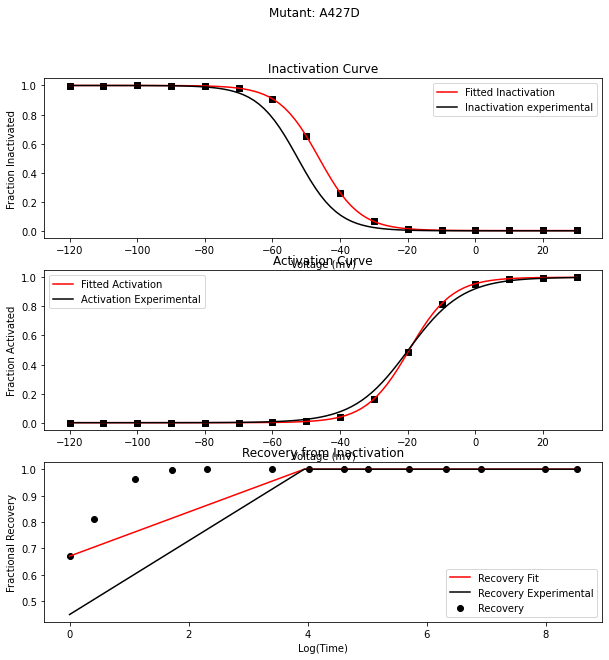

In [8]:

evaluator.plot_data(data, 'A427D')

/Users/workbench/Applications/nrn/repo/curve_fitting.py:26: RuntimeWarning: overflow encountered in exp
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


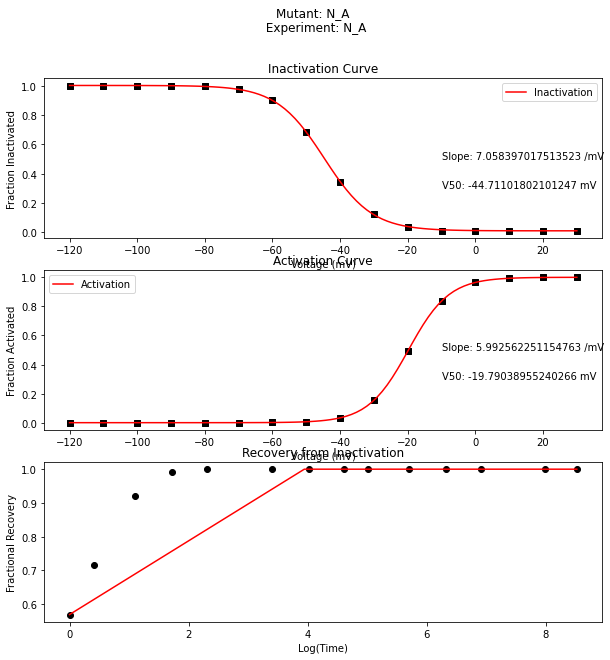

In [4]:

cf.gen_figure_given_params(data)

In [ ]:
 [55, .03, .01, .124, 0.4, 0.0003, .2, .01, .02, 7, 2, 1.5, .5, 7.2, 10, 8, -45, -45, -45, -30, 2, -58, -60, 12]